# Assignment 2 report
## Anton Marin

Some imports first

In [135]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import datetime
import numpy as np
import calendar
from sklearn.metrics import mean_squared_error
%matplotlib inline

This function adds given integer amount of months to a datetime object, returns a new datetime object

In [62]:
def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year,month)[1])
    return datetime.date(year,month,day)

Loading data

In [153]:
sunspot = loadmat('data/sunspot_number.mat')['SN_data']
predictions = loadmat('data/SN_predictions.mat')['SN_predictions'][:,2]
ground_truth = loadmat('data/sunspot_number_check.mat')['SN_data_check']

Extracting dates from data, converting them to datetime objects, also defining given prediction dates as last 6 months of data dates

In [91]:
dates=np.array(list(map(lambda x: datetime.datetime(year=int(x//100), month=int(x%100), day=1),sunspot[:,0])))
dates_prediction = [add_months(dates[-6], x) for x in range(len(predictions))]

Here 

In [168]:
dates_gt=np.array(list(map(lambda x: datetime.date(year=int(x//100), month=int(x%100), day=1),ground_truth[:,0])))

index_gt_start = None
index_gt_stop = None
for i in range(len(dates_gt)):
    if dates_gt[i] == dates_prediction[0]:
        index_gt_start = i
        
    if dates_gt[i] == dates_prediction[-1]:
        index_gt_stop = i

ground_truth_extracted = ground_truth[index_gt_start:index_gt_stop+1, 3]

In [92]:
first_measurement = -30

In [107]:
last_smoothed_value = sunspot[-7,3]

9.3000000000000007

In [102]:
R = sunspot[-6:,2]
Phi_1 = np.zeros(len(predictions)-1)
for i in range(len(Phi)):
    Phi_1[i] = predictions[i+1]/predictions[i]


In [114]:
R_extrapolated = np.zeros(7)
R_filtered = np.zeros(7)
sigma_extrapolated = np.zeros(7)
sigma_filtered = np.zeros(7)
K = np.zeros(7)

In [115]:
R_filtered[0] = last_smoothed_value
sigma_filtered[0] = 0

In [116]:
for i in range(1, 7):
    # extrapolation
    R_extrapolated[i]=Phi_1[i-1]*R_filtered[i-1]
    sigma_w = 0.2*R_filtered[i-1]
    sigma_v = 2.5*R_filtered[i-1]
    sigma_extrapolated[i] = Phi_1[i-1]**2 * sigma_filtered[i-1] + sigma_w
    
    # filtration
    K[i] = sigma_extrapolated[i]/(sigma_extrapolated[i] + sigma_v)
    R_filtered[i] = R_extrapolated[i] + K[i]*(R[i-1] - R_extrapolated[i])
    sigma_filtered[i] = (1 - K[i]) * sigma_extrapolated[i]

In [127]:
rest_predictions = np.zeros(len(predictions)-6)
rest_predictions[0]=Phi_1[5] * R_filtered[-1]
for i in range(1, len(rest_predictions)):
    rest_predictions[i]=Phi_1[i+5] * rest_predictions[i-1]

12 17


In [130]:
updated_predictions = np.zeros(len(predictions))
updated_predictions[:6] = R_filtered[1:]
updated_predictions[6:] = rest_predictions

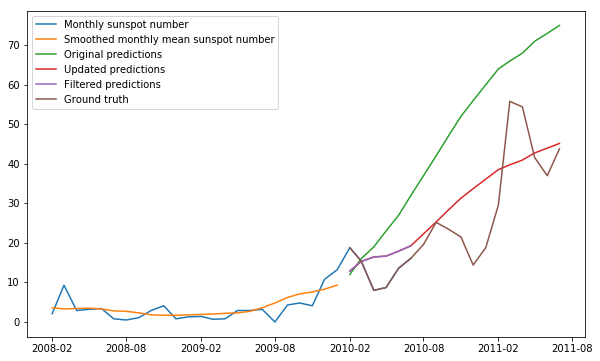

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(dates[first_measurement:], sunspot[first_measurement:,2], label='Monthly sunspot number')
plt.plot(dates[first_measurement:-6], sunspot[first_measurement:-6,3], label='Smoothed monthly mean sunspot number')
plt.plot(dates_prediction, predictions, label='Original predictions')
plt.plot(dates_prediction, updated_predictions, label='Updated predictions')
plt.plot(dates_prediction[:6], R_filtered[1:], label='Filtered predictions')
plt.plot(dates_prediction, ground_truth_extracted, label='Ground truth')
plt.legend()

In [208]:
mean_squared_error(predictions, ground_truth_extracted)**0.5


20.890069411086216

In [209]:
mean_squared_error(updated_predictions, ground_truth_extracted)**0.5

5.1575353484323383

In [207]:
(np.sum((predictions - ground_truth_extracted)**2)/(len(predictions)-1))**0.5

21.495704085180535

In [205]:
np.sum((predictions - ground_truth_extracted)**2)

7855.1100000000006

In [195]:
predictions

array([12, 16, 19, 23, 27, 32, 37, 42, 47, 52, 56, 60, 64, 66, 68, 71, 73,
       75], dtype=uint16)

In [196]:
ground_truth_extracted

array([ 10.6,  12.3,  14. ,  15.5,  16.4,  16.7,  17.4,  19.6,  23.2,
        26.5,  28.8,  30.9,  33.4,  36.9,  41.8,  47.6,  53.2,  57.3])

In [197]:
(predictions - ground_truth_extracted)**2

array([   1.96,   13.69,   25.  ,   56.25,  112.36,  234.09,  384.16,
        501.76,  566.44,  650.25,  739.84,  846.81,  936.36,  846.81,
        686.44,  547.56,  392.04,  313.29])

In [211]:
np.std(predictions - ground_truth_extracted)

9.1650789870849536

In [212]:
np.std(updated_predictions - ground_truth_extracted)

4.974043748507917